In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Using CPU.")
    device = torch.device("cpu")

CUDA is available. Using GPU.


In [3]:
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [4]:
# Load data
data_path = "C:/Users/hanba/OneDrive/Documents/GitProjects/MLHWCore/Homework/Homework 6 dev Neural Network/data/Housing-valid.csv"
data = pd.read_csv(data_path)

In [5]:
### Problem 1

In [6]:
# Assuming the last column is the target and the rest are features
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X_scaled).float()
y = torch.tensor(y.values).float().unsqueeze(1)  # Adding an extra dimension to y for compatibility

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data loaders
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Determine if GPU is available and move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(input_size=X_train.shape[1]).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation step
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, targets).item()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss / len(val_loader)}")

# Model complexity
total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters: ", total_params)

Epoch 1, Loss: 0.15756365656852722, Validation Loss: 0.4040544927120209
Epoch 2, Loss: 0.16477712988853455, Validation Loss: 0.3820292353630066
Epoch 3, Loss: 0.2586740255355835, Validation Loss: 0.3614439070224762
Epoch 4, Loss: 0.13833299279212952, Validation Loss: 0.3421875834465027
Epoch 5, Loss: 0.22312390804290771, Validation Loss: 0.3244832456111908
Epoch 6, Loss: 0.10564213246107101, Validation Loss: 0.30818971991539
Epoch 7, Loss: 0.15411502122879028, Validation Loss: 0.2937905490398407
Epoch 8, Loss: 0.10098036378622055, Validation Loss: 0.2806769013404846
Epoch 9, Loss: 0.06100951135158539, Validation Loss: 0.26931232213974
Epoch 10, Loss: 0.04704141616821289, Validation Loss: 0.25958573818206787
Total number of parameters:  449


In [ ]:
#1B

In [7]:
# Assuming the last column is the target and the rest are features
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X_scaled).float()
y = torch.tensor(y.values).float().unsqueeze(1)  # Adding an extra dimension to y for compatibility

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create data loaders
train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# Define the more complex neural network model
class ComplexNN(nn.Module):
    def __init__(self, input_size):
        super(ComplexNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 16)
        self.fc4 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Determine if GPU is available and move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ComplexNN(input_size=X_train.shape[1]).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # Set the number of epochs
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation step
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs, targets).item()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss / len(val_loader)}")

# Model complexity
total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters: ", total_params)


Epoch 1, Loss: 0.3513067960739136, Validation Loss: 0.4321686029434204
Epoch 2, Loss: 0.3552106022834778, Validation Loss: 0.4039691388607025
Epoch 3, Loss: 0.21376065909862518, Validation Loss: 0.37803128361701965
Epoch 4, Loss: 0.24874964356422424, Validation Loss: 0.35321691632270813
Epoch 5, Loss: 0.21251392364501953, Validation Loss: 0.33069661259651184
Epoch 6, Loss: 0.11910577118396759, Validation Loss: 0.30994030833244324
Epoch 7, Loss: 0.20391419529914856, Validation Loss: 0.29099342226982117
Epoch 8, Loss: 0.07864026725292206, Validation Loss: 0.27399906516075134
Epoch 9, Loss: 0.11073534190654755, Validation Loss: 0.2591230273246765
Epoch 10, Loss: 0.1662345826625824, Validation Loss: 0.2461998462677002
Total number of parameters:  3585


In [ ]:
#2A

In [8]:
import torchvision
import torchvision.transforms as transforms
import time
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

100%|██████████████████████████████████████████████████████████████| 170498071/170498071 [00:03<00:00, 54818914.34it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Loss: 1.6606952310218226
Epoch 2, Loss: 1.4749870227121027
Epoch 3, Loss: 1.3829641374175812
Epoch 4, Loss: 1.3136455915925447
Epoch 5, Loss: 1.2519997849183924
Epoch 6, Loss: 1.1983838690363842
Epoch 7, Loss: 1.1316892354537154
Epoch 8, Loss: 1.0872380412600535
Epoch 9, Loss: 1.028658549422803
Epoch 10, Loss: 0.987997975876874
Training completed in: 49.37 seconds


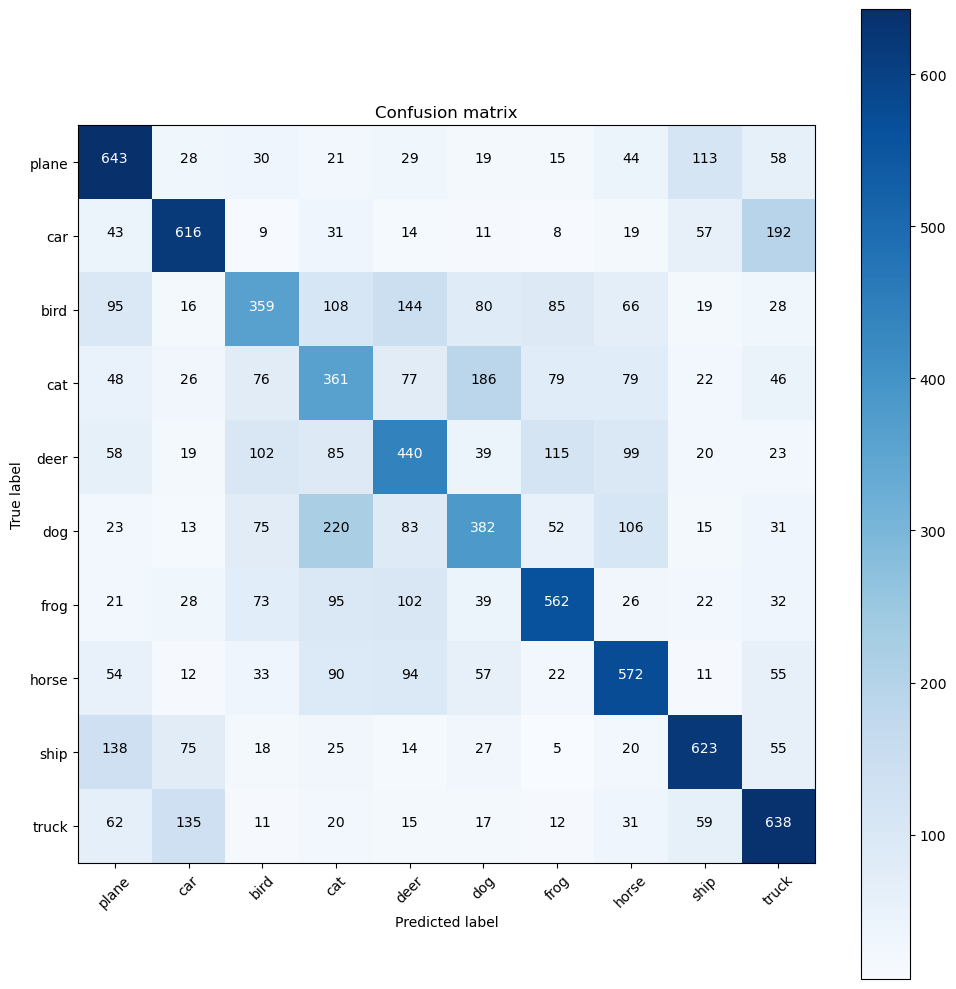

In [9]:
# Load and transform CIFAR-10 data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the neural network
class CIFAR10NN(nn.Module):
    def __init__(self):
        super(CIFAR10NN, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CIFAR10NN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the network
start_time = time.time()
num_epochs = 10  # Set the number of epochs
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in: {training_time:.2f} seconds")

# Evaluation and Confusion Matrix
true_labels = []
predicted_labels = []
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(conf_matrix, classes=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.show()

In [ ]:
#2b

In [10]:
# Load and transform CIFAR-10 data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the extended neural network
class ExtendedCIFAR10NN(nn.Module):
    def __init__(self):
        super(ExtendedCIFAR10NN, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ExtendedCIFAR10NN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the network
start_time = time.time()
num_epochs = 300  # Set the number of epochs
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in: {training_time:.2f} seconds")

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

# Model complexity
total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters in the extended model: ", total_params)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.6547506043063405
Epoch 2, Loss: 1.4358996748924255
Epoch 3, Loss: 1.3168852519043877
Epoch 4, Loss: 1.225019235592669
Epoch 5, Loss: 1.1442286760910698
Epoch 6, Loss: 1.0669350090539058
Epoch 7, Loss: 0.9895074327888391
Epoch 8, Loss: 0.9245565131192317
Epoch 9, Loss: 0.8578768152257671
Epoch 10, Loss: 0.7925243183703679
Epoch 11, Loss: 0.7323032338600939
Epoch 12, Loss: 0.6715601577097193
Epoch 13, Loss: 0.6277663126168653
Epoch 14, Loss: 0.5858837193273523
Epoch 15, Loss: 0.5410114672330334
Epoch 16, Loss: 0.5025428592815728
Epoch 17, Loss: 0.4813617799059509
Epoch 18, Loss: 0.447138134266257
Epoch 19, Loss: 0.4191282651270442
Epoch 20, Loss: 0.4104062535554704
Epoch 21, Loss: 0.38084028903252026
Epoch 22, Loss: 0.36616474995032294
Epoch 23, Loss: 0.34715129789489
Epoch 24, Loss: 0.3232211041290437
Epoch 25, Loss: 0.3201325982523239
Epoch 26, Loss: 0.3195721117393745
Epoch 27, Loss: 0.2972468